# 版本介紹

香蕉價格預測版本s2，
此版本目的是可以跑完模型並畫出圖，尚無判斷參數的選擇，以及預測結果是否合理
重要資訊簡介:
1. 氣候資料為5日 vs 1天價格
2. 進行shift
3. 2000.01.02開始

# 原始氣候資料清洗

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import urllib.request
import datetime
import pandas as pd 

In [ ]:
# 檔案下載url
weather_data_url = 'https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/reportdaily_mean_fillna.csv'
typhoon_data_url = 'https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/TyphoonDatabase.csv'
price_data_url = 'https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/lynnbai/dataset/Banana.csv'

In [ ]:
# 將檔案下載至colab
if not os.path.exists('weather.csv'): urllib.request.urlretrieve(weather_data_url, 'weather.csv') 
if not os.path.exists('typhoon.csv'): urllib.request.urlretrieve(typhoon_data_url, 'typhoon.csv') 
if not os.path.exists('price.csv'): urllib.request.urlretrieve(price_data_url, 'price.csv')

In [ ]:
# 所有城市對照英文代碼
city = {
    '基隆市':'KLU',
    '臺北市':'TPE',
    '新北市':'TPH',
    '桃園市':'TYC',
    '新竹市':'HSC',
    '新竹縣':'HSH',
    '苗栗縣':'MAL',
    '臺中市':'TXG',
    '彰化縣':'CWH',
    '南投縣':'NTO',
    '雲林縣':'YLH',
    '嘉義市':'CYI',
    '嘉義縣':'CHY',
    '臺南市':'TNN',
    '高雄市':'KHH',
    '屏東縣':'IUH',
    '宜蘭縣':'ILN',
    '花蓮縣':'HWA',
    '臺東縣':'TTT'
}

In [ ]:
df = pd.read_csv('weather.csv', encoding='utf-8')
# print(df)

In [ ]:
# 使用index做merge
df_date = df['date'].drop_duplicates().to_frame().set_index('date')

for cityname, citycode in city.items():
    df_city = df.loc[df['city'] == cityname].add_suffix('_' + citycode).set_index('date' + '_' + citycode)
    df_date = pd.merge(df_date, df_city, how='left', left_index = True, right_index = True)

df_date.to_csv('all.csv', encoding='utf-8')
# print(pd.read_csv('all.csv'))

In [ ]:
typhoon_df = pd.read_csv('typhoon.csv', encoding='utf-8')
weather_df = pd.read_csv('all.csv', encoding='utf-8')
weather_df['WarnMark'] = 0
# print(weather_df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


颱風警報期間控制：period_ctrl 可調整 weather_df 資料表 WarnMark 欄位值為 1 之天數，如下範例：
* period_ctrl = 0, 2020-06-03 ... 1, 2020-06-04 ... 1
* period_ctrl = 2, 2020-06-01 ... 1, 2020-06-02 ... 1, 2020-06-03 ... 1, 2020-06-04 ... 1




In [ ]:
# 警報日期處理
import datetime

period_ctrl = 0 # 颱風警報期間控制
warn_mark = list()
warn_start = list()
warn_end = list()

for wd in typhoon_df['Warning']:
  start = datetime.datetime.strptime(wd[0:10], '%Y-%m-%d')
  end = datetime.datetime.strptime(wd[17:27], '%Y-%m-%d')
  period = end - start # 每次颱風之期間時間資訊 (若為一天內的暫寫入0，表示僅有當天)
  # print(period.days)
  
  ctrl_start = start
  i = 0
  
  warn_mark.append(wd[0:10])
  while i < period.days: # 利用颱風天數期間append期間日期進warn_mark列表
    start = start + datetime.timedelta(days=1)
    warn_mark.append(datetime.datetime.strftime(start, '%Y-%m-%d'))
    i = i + 1
  warn_mark.append(wd[17:27])

  if period_ctrl != 0:
    j = 0
    while j < period_ctrl:
      ctrl_start = ctrl_start - datetime.timedelta(days=1)
      warn_mark.append(datetime.datetime.strftime(ctrl_start, '%Y-%m-%d'))
      j = j + 1

unique_set = set(warn_mark) # 打散日期排序
unique_list = list(unique_set)
warn_mark = list()
warn_mark = unique_list

In [ ]:
# 氣候欄位List
dataset_column_lists = ['date','city_KLU','StnPres_KLU','SeaPres_KLU','StnPresMax_KLU','StnPresMaxTime_KLU','StnPresMin_KLU','StnPresMinTime_KLU','Temperature_KLU','TMax_KLU','TMaxTime_KLU','TMin_KLU','TMinTime_KLU','TdDewPoint_KLU','RH_KLU','RHMin_KLU','RHMinTime_KLU','WS_KLU','WD_KLU','WSGust_KLU','WDGust_KLU','WGustTime_KLU','Precp_KLU','PrecpHour_KLU','PrecpMax10_KLU','PrecpMax10Time_KLU','PrecpMax60_KLU','PrecpMax60Time_KLU','SunShine_KLU','SunShineRate_KLU','GloblRad_KLU','VisbMean_KLU','EvapA_KLU','UVIMax_KLU','UVIMaxTime_KLU','CloudAmount_KLU','city_TPE','StnPres_TPE','SeaPres_TPE','StnPresMax_TPE','StnPresMaxTime_TPE','StnPresMin_TPE','StnPresMinTime_TPE','Temperature_TPE','TMax_TPE','TMaxTime_TPE','TMin_TPE','TMinTime_TPE','TdDewPoint_TPE','RH_TPE','RHMin_TPE','RHMinTime_TPE','WS_TPE','WD_TPE','WSGust_TPE','WDGust_TPE','WGustTime_TPE','Precp_TPE','PrecpHour_TPE','PrecpMax10_TPE','PrecpMax10Time_TPE','PrecpMax60_TPE','PrecpMax60Time_TPE','SunShine_TPE','SunShineRate_TPE','GloblRad_TPE','VisbMean_TPE','EvapA_TPE','UVIMax_TPE','UVIMaxTime_TPE','CloudAmount_TPE','city_TPH','StnPres_TPH','SeaPres_TPH','StnPresMax_TPH','StnPresMaxTime_TPH','StnPresMin_TPH','StnPresMinTime_TPH','Temperature_TPH','TMax_TPH','TMaxTime_TPH','TMin_TPH','TMinTime_TPH','TdDewPoint_TPH','RH_TPH','RHMin_TPH','RHMinTime_TPH','WS_TPH','WD_TPH','WSGust_TPH','WDGust_TPH','WGustTime_TPH','Precp_TPH','PrecpHour_TPH','PrecpMax10_TPH','PrecpMax10Time_TPH','PrecpMax60_TPH','PrecpMax60Time_TPH','SunShine_TPH','SunShineRate_TPH','GloblRad_TPH','VisbMean_TPH','EvapA_TPH','UVIMax_TPH','UVIMaxTime_TPH','CloudAmount_TPH','city_TYC','StnPres_TYC','SeaPres_TYC','StnPresMax_TYC','StnPresMaxTime_TYC','StnPresMin_TYC','StnPresMinTime_TYC','Temperature_TYC','TMax_TYC','TMaxTime_TYC','TMin_TYC','TMinTime_TYC','TdDewPoint_TYC','RH_TYC','RHMin_TYC','RHMinTime_TYC','WS_TYC','WD_TYC','WSGust_TYC','WDGust_TYC','WGustTime_TYC','Precp_TYC','PrecpHour_TYC','PrecpMax10_TYC','PrecpMax10Time_TYC','PrecpMax60_TYC','PrecpMax60Time_TYC','SunShine_TYC','SunShineRate_TYC','GloblRad_TYC','VisbMean_TYC','EvapA_TYC','UVIMax_TYC','UVIMaxTime_TYC','CloudAmount_TYC','city_HSC','StnPres_HSC','SeaPres_HSC','StnPresMax_HSC','StnPresMaxTime_HSC','StnPresMin_HSC','StnPresMinTime_HSC','Temperature_HSC','TMax_HSC','TMaxTime_HSC','TMin_HSC','TMinTime_HSC','TdDewPoint_HSC','RH_HSC','RHMin_HSC','RHMinTime_HSC','WS_HSC','WD_HSC','WSGust_HSC','WDGust_HSC','WGustTime_HSC','Precp_HSC','PrecpHour_HSC','PrecpMax10_HSC','PrecpMax10Time_HSC','PrecpMax60_HSC','PrecpMax60Time_HSC','SunShine_HSC','SunShineRate_HSC','GloblRad_HSC','VisbMean_HSC','EvapA_HSC','UVIMax_HSC','UVIMaxTime_HSC','CloudAmount_HSC','city_HSH','StnPres_HSH','SeaPres_HSH','StnPresMax_HSH','StnPresMaxTime_HSH','StnPresMin_HSH','StnPresMinTime_HSH','Temperature_HSH','TMax_HSH','TMaxTime_HSH','TMin_HSH','TMinTime_HSH','TdDewPoint_HSH','RH_HSH','RHMin_HSH','RHMinTime_HSH','WS_HSH','WD_HSH','WSGust_HSH','WDGust_HSH','WGustTime_HSH','Precp_HSH','PrecpHour_HSH','PrecpMax10_HSH','PrecpMax10Time_HSH','PrecpMax60_HSH','PrecpMax60Time_HSH','SunShine_HSH','SunShineRate_HSH','GloblRad_HSH','VisbMean_HSH','EvapA_HSH','UVIMax_HSH','UVIMaxTime_HSH','CloudAmount_HSH','city_MAL','StnPres_MAL','SeaPres_MAL','StnPresMax_MAL','StnPresMaxTime_MAL','StnPresMin_MAL','StnPresMinTime_MAL','Temperature_MAL','TMax_MAL','TMaxTime_MAL','TMin_MAL','TMinTime_MAL','TdDewPoint_MAL','RH_MAL','RHMin_MAL','RHMinTime_MAL','WS_MAL','WD_MAL','WSGust_MAL','WDGust_MAL','WGustTime_MAL','Precp_MAL','PrecpHour_MAL','PrecpMax10_MAL','PrecpMax10Time_MAL','PrecpMax60_MAL','PrecpMax60Time_MAL','SunShine_MAL','SunShineRate_MAL','GloblRad_MAL','VisbMean_MAL','EvapA_MAL','UVIMax_MAL','UVIMaxTime_MAL','CloudAmount_MAL','city_TXG','StnPres_TXG','SeaPres_TXG','StnPresMax_TXG','StnPresMaxTime_TXG','StnPresMin_TXG','StnPresMinTime_TXG','Temperature_TXG','TMax_TXG','TMaxTime_TXG','TMin_TXG','TMinTime_TXG','TdDewPoint_TXG','RH_TXG','RHMin_TXG','RHMinTime_TXG','WS_TXG','WD_TXG','WSGust_TXG','WDGust_TXG','WGustTime_TXG','Precp_TXG','PrecpHour_TXG','PrecpMax10_TXG','PrecpMax10Time_TXG','PrecpMax60_TXG','PrecpMax60Time_TXG','SunShine_TXG','SunShineRate_TXG','GloblRad_TXG','VisbMean_TXG','EvapA_TXG','UVIMax_TXG','UVIMaxTime_TXG','CloudAmount_TXG','city_CWH','StnPres_CWH','SeaPres_CWH','StnPresMax_CWH','StnPresMaxTime_CWH','StnPresMin_CWH','StnPresMinTime_CWH','Temperature_CWH','TMax_CWH','TMaxTime_CWH','TMin_CWH','TMinTime_CWH','TdDewPoint_CWH','RH_CWH','RHMin_CWH','RHMinTime_CWH','WS_CWH','WD_CWH','WSGust_CWH','WDGust_CWH','WGustTime_CWH','Precp_CWH','PrecpHour_CWH','PrecpMax10_CWH','PrecpMax10Time_CWH','PrecpMax60_CWH','PrecpMax60Time_CWH','SunShine_CWH','SunShineRate_CWH','GloblRad_CWH','VisbMean_CWH','EvapA_CWH','UVIMax_CWH','UVIMaxTime_CWH','CloudAmount_CWH','city_NTO','StnPres_NTO','SeaPres_NTO','StnPresMax_NTO','StnPresMaxTime_NTO','StnPresMin_NTO','StnPresMinTime_NTO','Temperature_NTO','TMax_NTO','TMaxTime_NTO','TMin_NTO','TMinTime_NTO','TdDewPoint_NTO','RH_NTO','RHMin_NTO','RHMinTime_NTO','WS_NTO','WD_NTO','WSGust_NTO','WDGust_NTO','WGustTime_NTO','Precp_NTO','PrecpHour_NTO','PrecpMax10_NTO','PrecpMax10Time_NTO','PrecpMax60_NTO','PrecpMax60Time_NTO','SunShine_NTO','SunShineRate_NTO','GloblRad_NTO','VisbMean_NTO','EvapA_NTO','UVIMax_NTO','UVIMaxTime_NTO','CloudAmount_NTO','city_YLH','StnPres_YLH','SeaPres_YLH','StnPresMax_YLH','StnPresMaxTime_YLH','StnPresMin_YLH','StnPresMinTime_YLH','Temperature_YLH','TMax_YLH','TMaxTime_YLH','TMin_YLH','TMinTime_YLH','TdDewPoint_YLH','RH_YLH','RHMin_YLH','RHMinTime_YLH','WS_YLH','WD_YLH','WSGust_YLH','WDGust_YLH','WGustTime_YLH','Precp_YLH','PrecpHour_YLH','PrecpMax10_YLH','PrecpMax10Time_YLH','PrecpMax60_YLH','PrecpMax60Time_YLH','SunShine_YLH','SunShineRate_YLH','GloblRad_YLH','VisbMean_YLH','EvapA_YLH','UVIMax_YLH','UVIMaxTime_YLH','CloudAmount_YLH','city_CYI','StnPres_CYI','SeaPres_CYI','StnPresMax_CYI','StnPresMaxTime_CYI','StnPresMin_CYI','StnPresMinTime_CYI','Temperature_CYI','TMax_CYI','TMaxTime_CYI','TMin_CYI','TMinTime_CYI','TdDewPoint_CYI','RH_CYI','RHMin_CYI','RHMinTime_CYI','WS_CYI','WD_CYI','WSGust_CYI','WDGust_CYI','WGustTime_CYI','Precp_CYI','PrecpHour_CYI','PrecpMax10_CYI','PrecpMax10Time_CYI','PrecpMax60_CYI','PrecpMax60Time_CYI','SunShine_CYI','SunShineRate_CYI','GloblRad_CYI','VisbMean_CYI','EvapA_CYI','UVIMax_CYI','UVIMaxTime_CYI','CloudAmount_CYI','city_CHY','StnPres_CHY','SeaPres_CHY','StnPresMax_CHY','StnPresMaxTime_CHY','StnPresMin_CHY','StnPresMinTime_CHY','Temperature_CHY','TMax_CHY','TMaxTime_CHY','TMin_CHY','TMinTime_CHY','TdDewPoint_CHY','RH_CHY','RHMin_CHY','RHMinTime_CHY','WS_CHY','WD_CHY','WSGust_CHY','WDGust_CHY','WGustTime_CHY','Precp_CHY','PrecpHour_CHY','PrecpMax10_CHY','PrecpMax10Time_CHY','PrecpMax60_CHY','PrecpMax60Time_CHY','SunShine_CHY','SunShineRate_CHY','GloblRad_CHY','VisbMean_CHY','EvapA_CHY','UVIMax_CHY','UVIMaxTime_CHY','CloudAmount_CHY','city_TNN','StnPres_TNN','SeaPres_TNN','StnPresMax_TNN','StnPresMaxTime_TNN','StnPresMin_TNN','StnPresMinTime_TNN','Temperature_TNN','TMax_TNN','TMaxTime_TNN','TMin_TNN','TMinTime_TNN','TdDewPoint_TNN','RH_TNN','RHMin_TNN','RHMinTime_TNN','WS_TNN','WD_TNN','WSGust_TNN','WDGust_TNN','WGustTime_TNN','Precp_TNN','PrecpHour_TNN','PrecpMax10_TNN','PrecpMax10Time_TNN','PrecpMax60_TNN','PrecpMax60Time_TNN','SunShine_TNN','SunShineRate_TNN','GloblRad_TNN','VisbMean_TNN','EvapA_TNN','UVIMax_TNN','UVIMaxTime_TNN','CloudAmount_TNN','city_KHH','StnPres_KHH','SeaPres_KHH','StnPresMax_KHH','StnPresMaxTime_KHH','StnPresMin_KHH','StnPresMinTime_KHH','Temperature_KHH','TMax_KHH','TMaxTime_KHH','TMin_KHH','TMinTime_KHH','TdDewPoint_KHH','RH_KHH','RHMin_KHH','RHMinTime_KHH','WS_KHH','WD_KHH','WSGust_KHH','WDGust_KHH','WGustTime_KHH','Precp_KHH','PrecpHour_KHH','PrecpMax10_KHH','PrecpMax10Time_KHH','PrecpMax60_KHH','PrecpMax60Time_KHH','SunShine_KHH','SunShineRate_KHH','GloblRad_KHH','VisbMean_KHH','EvapA_KHH','UVIMax_KHH','UVIMaxTime_KHH','CloudAmount_KHH','city_IUH','StnPres_IUH','SeaPres_IUH','StnPresMax_IUH','StnPresMaxTime_IUH','StnPresMin_IUH','StnPresMinTime_IUH','Temperature_IUH','TMax_IUH','TMaxTime_IUH','TMin_IUH','TMinTime_IUH','TdDewPoint_IUH','RH_IUH','RHMin_IUH','RHMinTime_IUH','WS_IUH','WD_IUH','WSGust_IUH','WDGust_IUH','WGustTime_IUH','Precp_IUH','PrecpHour_IUH','PrecpMax10_IUH','PrecpMax10Time_IUH','PrecpMax60_IUH','PrecpMax60Time_IUH','SunShine_IUH','SunShineRate_IUH','GloblRad_IUH','VisbMean_IUH','EvapA_IUH','UVIMax_IUH','UVIMaxTime_IUH','CloudAmount_IUH','city_ILN','StnPres_ILN','SeaPres_ILN','StnPresMax_ILN','StnPresMaxTime_ILN','StnPresMin_ILN','StnPresMinTime_ILN','Temperature_ILN','TMax_ILN','TMaxTime_ILN','TMin_ILN','TMinTime_ILN','TdDewPoint_ILN','RH_ILN','RHMin_ILN','RHMinTime_ILN','WS_ILN','WD_ILN','WSGust_ILN','WDGust_ILN','WGustTime_ILN','Precp_ILN','PrecpHour_ILN','PrecpMax10_ILN','PrecpMax10Time_ILN','PrecpMax60_ILN','PrecpMax60Time_ILN','SunShine_ILN','SunShineRate_ILN','GloblRad_ILN','VisbMean_ILN','EvapA_ILN','UVIMax_ILN','UVIMaxTime_ILN','CloudAmount_ILN','city_HWA','StnPres_HWA','SeaPres_HWA','StnPresMax_HWA','StnPresMaxTime_HWA','StnPresMin_HWA','StnPresMinTime_HWA','Temperature_HWA','TMax_HWA','TMaxTime_HWA','TMin_HWA','TMinTime_HWA','TdDewPoint_HWA','RH_HWA','RHMin_HWA','RHMinTime_HWA','WS_HWA','WD_HWA','WSGust_HWA','WDGust_HWA','WGustTime_HWA','Precp_HWA','PrecpHour_HWA','PrecpMax10_HWA','PrecpMax10Time_HWA','PrecpMax60_HWA','PrecpMax60Time_HWA','SunShine_HWA','SunShineRate_HWA','GloblRad_HWA','VisbMean_HWA','EvapA_HWA','UVIMax_HWA','UVIMaxTime_HWA','CloudAmount_HWA','city_TTT','StnPres_TTT','SeaPres_TTT','StnPresMax_TTT','StnPresMaxTime_TTT','StnPresMin_TTT','StnPresMinTime_TTT','Temperature_TTT','TMax_TTT','TMaxTime_TTT','TMin_TTT','TMinTime_TTT','TdDewPoint_TTT','RH_TTT','RHMin_TTT','RHMinTime_TTT','WS_TTT','WD_TTT','WSGust_TTT','WDGust_TTT','WGustTime_TTT','Precp_TTT','PrecpHour_TTT','PrecpMax10_TTT','PrecpMax10Time_TTT','PrecpMax60_TTT','PrecpMax60Time_TTT','SunShine_TTT','SunShineRate_TTT','GloblRad_TTT','VisbMean_TTT','EvapA_TTT','UVIMax_TTT','UVIMaxTime_TTT','CloudAmount_TTT','WarnMark']

清洗後之氣候資料輸出

In [ ]:
import csv

weather_list = weather_df.values.tolist()

with open('weather_dataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  
  writer.writerow(dataset_column_lists)

  for wl in weather_list:
    f = 0
    for wm in warn_mark:
      if wl[0] == wm:
        wl[666] = 1 # w1[666]即為 warn_mark值之所在
        writer.writerow(wl)
        f = 1
    if f == 0:
      writer.writerow(wl)

# 環境與資料匯入

In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, GRU, TimeDistributed, RepeatVector, Lambda
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

weather = pd.read_csv('weather_dataset.csv', encoding='utf-8')
market = pd.read_csv('price.csv', encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 資料預處理

# 市場
1. 選定 台北一 市場
2. 以空值前後二天之平均 補其 空值

a. market_tp1_df['Avg_price'] 為整理後之台北一市場之平均價格 -- DataFrame \\
b. market_other_tp1_df 為整理後之 台北一市場之其他資訊 -- DataFrame \\
     Up_price, Mid_price, Low_price, Volume

In [ ]:
price_columns = ['Up_price', 'Mid_price', 'Low_price', 'Avg_price']
columns = ['Up_price', 'Mid_price', 'Low_price', 'Avg_price', 'Volume']

market_tp1_df = market.loc[market['Market'] == '台北一']
market_tp1_df = market_tp1_df.rename(columns={'Date': 'date'}).set_index('date')
market_tp1_df = market_tp1_df[columns]
# med = price_tp1_df.loc[:,columns].median()
# values = {'Up_price':med['Up_price'], 'Mid_price':med['Mid_price'], 'Low_price':med['Low_price'], 'Avg_price':med['Avg_price'], 'Volume':med['Volume']}
# new_price_tp1_df = price_tp1_df.fillna(value=values)

def fillna_fb_mean(self):
    df_f = self.fillna(method='ffill')
    df_b = self.fillna(method='bfill')
    df_fb = (df_f+df_b)/2
    return df_fb
market_tp1_df

,Up_price,Mid_price,Low_price,Avg_price,Volume
date,,,,,
2000-01-02,30.0,22.0,14.0,20.2,22319.0
2000-01-03,26.0,18.0,12.0,19.5,15810.0
2000-01-04,28.0,18.0,12.0,20.3,15126.0
2000-01-05,28.0,20.0,10.0,20.0,18693.0
2000-01-06,28.0,20.0,10.0,20.3,22677.0
...,...,...,...,...,...
2021-06-15,NaN,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN,NaN
2021-06-17,32.5,23.4,13.3,23.2,18276.0


In [ ]:
# 價格
# 以空值前後平均補空值
# market_price_tp1_df = fillna_fb_mean(market_tp1_df.loc[:, price_columns])
# market_avg_price_tp1_df = market_price_tp1_df['Avg_price']
# market_avg_tp1_df = market_avg_tp1_df.reset_index()
# market_other_price_tp1_df = market_price_tp1_df.drop(['Avg_price'], axis=1)
market_tp1_df.loc[:, price_columns] = fillna_fb_mean(market_tp1_df.loc[:, price_columns])
# market_tp1_df

In [ ]:
# 量
# 以0補空值
# market_volume_tp1_df
# market_volume_tp1_df = market_tp1_df['Volume']
# market_volume_tp1_df = market_volume_tp1_df.fillna(0)
market_tp1_df['Volume'] = market_tp1_df['Volume'].fillna(0)

# 非平均價之欄位
# market_other_tp1_df = market_tp1_df.drop(['Avg_price'], axis=1)
# market_other_tp1_df
# market_tp1_df

# 氣象
1. 選出 與模型無關者排除
2. 其餘暫無空值

weather_df 為整理後之氣象資料 -- DataFrame

In [ ]:
# drop the useless 
drop_list = ['city_KLU','city_TPE','city_TPH','city_TYC','city_HSC','city_HSH','city_MAL','city_TXG','city_CWH','city_NTO','city_YLH','city_CYI','city_CHY','city_TNN','city_KHH','city_IUH','city_ILN','city_HWA','city_TTT','StnPresMaxTime_KLU','StnPresMinTime_KLU','TMaxTime_KLU','TMinTime_KLU','RHMinTime_KLU','WGustTime_KLU','PrecpMax10Time_KLU','PrecpMax60Time_KLU','UVIMaxTime_KLU','UVIMaxTime_KLU','StnPresMaxTime_TPE','StnPresMinTime_TPE','TMaxTime_TPE','TMinTime_TPE','RHMinTime_TPE','WGustTime_TPE','PrecpMax10Time_TPE','PrecpMax60_TPE','PrecpMax60Time_TPE','UVIMaxTime_TPE','StnPresMaxTime_TPH','StnPresMinTime_TPH','TMaxTime_TPH','TMinTime_TPH','RHMinTime_TPH','WGustTime_TPH','PrecpMax10Time_TPH','PrecpMax60_TPH','PrecpMax60Time_TPH','UVIMaxTime_TPH','StnPresMaxTime_TYC','StnPresMinTime_TYC','TMaxTime_TYC','TMinTime_TYC','RHMinTime_TYC','WGustTime_TYC','PrecpMax10Time_TYC','PrecpMax60_TYC','PrecpMax60Time_TYC','UVIMaxTime_TYC','StnPresMaxTime_HSC','StnPresMinTime_HSC','TMaxTime_HSC','TMinTime_HSC','RHMinTime_HSC','WGustTime_HSC','PrecpMax10Time_HSC','PrecpMax60_HSC','PrecpMax60Time_HSC','UVIMaxTime_HSC','StnPresMaxTime_HSH','StnPresMinTime_HSH','TMaxTime_HSH','TMinTime_HSH','RHMinTime_HSH','WGustTime_HSH','PrecpMax10Time_HSH','PrecpMax60_HSH','PrecpMax60Time_HSH','UVIMaxTime_HSH','StnPresMaxTime_MAL','StnPresMinTime_MAL','TMaxTime_MAL','TMinTime_MAL','RHMinTime_MAL','WGustTime_MAL','PrecpMax10Time_MAL','PrecpMax60_MAL','PrecpMax60Time_MAL','UVIMaxTime_MAL','StnPresMaxTime_TXG','StnPresMinTime_TXG','TMaxTime_TXG','TMinTime_TXG','RHMinTime_TXG','WGustTime_TXG','PrecpMax10Time_TXG','PrecpMax60_TXG','PrecpMax60Time_TXG','UVIMaxTime_TXG','StnPresMaxTime_CWH','StnPresMinTime_CWH','TMaxTime_CWH','TMinTime_CWH','RHMinTime_CWH','WGustTime_CWH','PrecpMax10Time_CWH','PrecpMax60_CWH','PrecpMax60Time_CWH','UVIMaxTime_CWH','StnPresMaxTime_NTO','StnPresMinTime_NTO','TMaxTime_NTO','TMinTime_NTO','RHMinTime_NTO','WGustTime_NTO','PrecpMax10Time_NTO','PrecpMax60_NTO','PrecpMax60Time_NTO','UVIMaxTime_NTO','StnPresMaxTime_YLH','StnPresMinTime_YLH','TMaxTime_YLH','TMinTime_YLH','RHMinTime_YLH','WGustTime_YLH','PrecpMax10Time_YLH','PrecpMax60_YLH','PrecpMax60Time_YLH','UVIMaxTime_YLH','StnPresMaxTime_CYI','StnPresMinTime_CYI','TMaxTime_CYI','TMinTime_CYI','RHMinTime_CYI','WGustTime_CYI','PrecpMax10Time_CYI','PrecpMax60_CYI','PrecpMax60Time_CYI','UVIMaxTime_CYI','StnPresMaxTime_CHY','StnPresMinTime_CHY','TMaxTime_CHY','TMinTime_CHY','RHMinTime_CHY','WGustTime_CHY','PrecpMax10Time_CHY','PrecpMax60_CHY','PrecpMax60Time_CHY','UVIMaxTime_CHY','StnPresMaxTime_TNN','StnPresMinTime_TNN','TMaxTime_TNN','TMinTime_TNN','RHMinTime_TNN','WGustTime_TNN','PrecpMax10Time_TNN','PrecpMax60_TNN','PrecpMax60Time_TNN','UVIMaxTime_TNN','StnPresMaxTime_KHH','StnPresMinTime_KHH','TMaxTime_KHH','TMinTime_KHH','RHMinTime_KHH','WGustTime_KHH','PrecpMax10Time_KHH','PrecpMax60_KHH','PrecpMax60Time_KHH','UVIMaxTime_KHH','StnPresMaxTime_IUH','StnPresMinTime_IUH','TMaxTime_IUH','TMinTime_IUH','RHMinTime_IUH','WGustTime_IUH','PrecpMax10Time_IUH','PrecpMax60_IUH','PrecpMax60Time_IUH','UVIMaxTime_IUH','StnPresMaxTime_ILN','StnPresMinTime_ILN','TMaxTime_ILN','TMinTime_ILN','RHMinTime_ILN','WGustTime_ILN','PrecpMax10Time_ILN','PrecpMax60_ILN','PrecpMax60Time_ILN','UVIMaxTime_ILN','StnPresMaxTime_HWA','StnPresMinTime_HWA','TMaxTime_HWA','TMinTime_HWA','RHMinTime_HWA','WGustTime_HWA','PrecpMax10Time_HWA','PrecpMax60_HWA','PrecpMax60Time_HWA','UVIMaxTime_HWA','StnPresMaxTime_TTT','StnPresMinTime_TTT','TMaxTime_TTT','TMinTime_TTT','RHMinTime_TTT','WGustTime_TTT','PrecpMax10Time_TTT','PrecpMax60_TTT','PrecpMax60Time_TTT','UVIMaxTime_TTT']
print(len(drop_list))
weather_df = weather.drop(drop_list, axis=1)
weather_df = weather_df.set_index('date')

209


Dataset 空值數量確認

In [ ]:
# na 數量計算
market_tp1_na_count = market_tp1_df.isna().sum()
weather_na_count = weather_df.isna().sum()

total_na_count = list() # 氣象空值查找
for i in range(len(weather_na_count.index)):
  if weather_na_count.values[i] != 0 :
    total_na_count.append([weather_na_count.index[i], weather_na_count.values[i]])

print(market_tp1_na_count)
print(len(total_na_count))

if not os.path.exists('market_tp1_df.xlsx'): market_tp1_df.to_excel('market_tp1_df.xlsx', index=True)
if not os.path.exists('weather_df.csv'): weather_df.to_csv('weather_df.csv', index=True)

Up_price     0
Mid_price    0
Low_price    0
Avg_price    0
Volume       0
dtype: int64
0


# 資料範圍確認

資料區間確認
1. 加入天氣
2. 往前往後
3. 期間
4. 模型使用

In [ ]:
# 是否要加入天氣資料
add_weathen_data = True
# # 是否要加入颱風資料
# add_typhoon_data = True
pastDay = 5
futureDay = 3
# 畫多少天的預測圖，要小於或等於上面的數字
plotDay = 3
# 訂定訓練資料的期間、測試資料的期間
train_start_date = '2000-01-02'
train_end_date = '2020-05-31'
test_start_date = '2020-06-01'
test_end_date = '2021-06-18'
# 使用哪一個模型，目前有1, 2
model_no = 1

參數選擇

In [ ]:
model_version = 'S2' 
save_route = '/content/drive/MyDrive/Ai團專_農時_共享資料夾/模型與成果/'
pic_days = 150

資料Batch化函式 \
1. buildX
2. buildY

In [ ]:
# 將資料整理為x
def buildX(train, pastDay=30, futureDay=5):
    x = []
    for i in range(train.shape[0] - futureDay - pastDay):
        x.append(train[i : i+pastDay])
    return np.array(x)

# 將資料整理為x, y
def buildY(test, pastDay=30, futureDay=5):
    y = []
    for i in range(test.shape[0] - futureDay - pastDay):
        y.append(test[i+pastDay+futureDay : i+pastDay+futureDay+1, -1])
    return np.array(y)

df_all 不論區間，所有資料合併

In [ ]:
df_all = market_tp1_df
# 是否要合併資料
if add_weathen_data is True:
    df_all = pd.merge(df_all, weather_df, how='inner', left_index = True, right_index = True)
# if add_typhoon_data is True:
#   df_all = pd.merge(df_all, df_typhoon, how='left', left_index = True, right_index = True).fillna(0)

# 把平均價格移到最後1欄
col_Avg_price = df_all.pop('Avg_price')
df_all = pd.concat([df_all, col_Avg_price], 1)
df_all.shape

(7839, 463)

依照訓練、測試的期間來切分資料 \
df_train 與 df_test

In [ ]:
# 將資料複製一份來作業, 將欄位index改為date
df = df_all.copy()
df = df.reset_index().rename(columns={'index': 'date'})

# 依訓練資料的期間、測試資料的期間來切分資料
df_train = df.iloc[df[(train_start_date <= df.date) & (df.date <= train_end_date)].index].set_index('date')
df_test = df.iloc[df[(test_start_date <= df.date) & (df.date <= test_end_date)].index].set_index('date')

# 將非數字的欄位移除
df_train = df_train.select_dtypes(exclude=['object'])
df_test = df_test.select_dtypes(exclude=['object'])

# print(df_train.dtypes)
print(df_train.shape)
print(df_test.shape)
# print(df.shape)
# df_train['Avg_price']

(7456, 463)
(383, 463)


# 模型參數調整

x_sorted_data 為 氣候 MinMaxScaler後之資料 \\
y_sorted_data 為 市場 MinMaxScaler後之資料


In [ ]:
# train 正則化
df_train_scaled = df_train.values
xx_scale = MinMaxScaler()
x_train = buildX(xx_scale.fit_transform(df_train_scaled), pastDay, futureDay)
print('x_train.shape', x_train.shape)

yy_scale = MinMaxScaler()
y_train_fitted_data = yy_scale.fit_transform(df_train_scaled[:, -1].reshape(-1, 1))
y_train = buildY(y_train_fitted_data, pastDay, futureDay)
print('y_train.shape: ', y_train.shape)

# test 正則化
df_test_scaled = df_test.values
x_test = buildX(xx_scale.fit_transform(df_test_scaled), pastDay, futureDay)
print('x_test.shape: ', x_test.shape)

y_test = buildY(yy_scale.fit_transform(df_test_scaled[:, -1].reshape(-1, 1)), pastDay, futureDay)
print('y_test.shape: ', y_test.shape)

x_train.shape (7448, 5, 463)
y_train.shape:  (7448, 1)
x_test.shape:  (375, 5, 463)
y_test.shape:  (375, 1)


# 模型選擇

In [ ]:
# 模型1 (from 原本)
def buildManyToManyModel(shape):
    model = Sequential()
    # model.add(GRU(units=256,
    #     return_sequences=False,
    #     input_shape=(shape[1], shape[2])))
    
    model.add(LSTM(units=256,
        return_sequences=True,
        input_shape=(shape[1], shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128, return_sequences=False,))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mse', optimizer='adam')
    model.summary()
    return model

In [ ]:
# 模型2
def buildManyToManyModel2(shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(shape[1], shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

# 模型訓練

In [ ]:
# 模型訓練
if model_no == 1:
    model = buildManyToManyModel(x_train.shape)
    print('model1')
    model_name = 'banana_prediction_model_v1'
elif model_no == 2:
    model = buildManyToManyModel2(x_train.shape)
    print('model2')
    model_name = 'banana_prediction_model_v2'
# elif model_no == 3:
#   model = buildManyToManyModel3(x_train.shape)
#   print('model3')
else:
    print('選錯model了')

callback = EarlyStopping(monitor="loss", patience=20, verbose=1, mode="auto")
batch_size = 30
epochs = 300
validation_split = 0.1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 256)            737280    
_________________________________________________________________
dropout (Dropout)            (None, 5, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 934,529
Trainable params: 934,529
Non-trainable params: 0
_________________________________________________________________
model1


In [ ]:
# model = load_model(f'{save_route}h5/banana_prediction_model_v1_s2_0721-02:08.h5')
# print("MODEL-LOADED")

# model.fit(x_train, y_train, epochs=500, batch_size=128, validation_data=(x_val, y_val), callbacks=[callback])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, callbacks=[callback])



Epoch 1/300
224/224 [==============================] - 33s 47ms/step - loss: 0.0177 - val_loss: 0.0050
Epoch 2/300
224/224 [==============================] - 10s 43ms/step - loss: 0.0029 - val_loss: 0.0041
Epoch 3/300
224/224 [==============================] - 10s 43ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 4/300
224/224 [==============================] - 10s 43ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 5/300
224/224 [==============================] - 10s 43ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/300
224/224 [==============================] - 10s 43ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 7/300
224/224 [==============================] - 10s 44ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 8/300
224/224 [==============================] - 10s 44ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 9/300
224/224 [==============================] - 10s 43ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 10/300
224/224 [==============================] - 10s 45ms/step - l

In [ ]:
# 取得現在時間(TP)
from datetime import datetime, timezone, timedelta
# 設定為 +8 時區
# 取得現在時間、指定時區、轉為 ISO 格式
time_now = datetime.now(timezone(timedelta(hours=+8))).isoformat(timespec="seconds")[5:16]
time_now = time_now.replace('-', '', 1).replace('T', '-')
time_now

'0721-12:31'

In [ ]:
model.save(f'{save_route}h5/{model_name}_s2_{time_now}.h5')
print('MODEL-SAVED')

MODEL-SAVED


fit()用於訓練具有給定輸入的模型。

predict()用於實際預測。它爲輸入樣本生成輸出預測。

evaluate()用於評估已經過訓練的模型。返回模型的損失值&指標值。

In [ ]:
score = model.evaluate(x_test, y_test)
print('Score: {}'.format(score))
y_pre = model.predict(x_test)
score
print(y_pre.shape)
y_test.shape

12/12 [==============================] - 0s 16ms/step - loss: 0.0151
Score: 0.015082059428095818
(375, 1)


(375, 1)

預測結果與實際結果的 數值迴轉 \
y_pre  --> pre_price \
y_test --> test_price

# 結果展示

In [ ]:
pre_price = yy_scale.inverse_transform(y_pre)
test_price = yy_scale.inverse_transform(y_test)
print('pre_price.shape: ', pre_price.shape)
print('test_price.shape: ', test_price.shape)
diff_price = pre_price - test_price
print('diff_price.shape: ', diff_price.shape)

pre_price.shape:  (375, 1)
test_price.shape:  (375, 1)
diff_price.shape:  (375, 1)


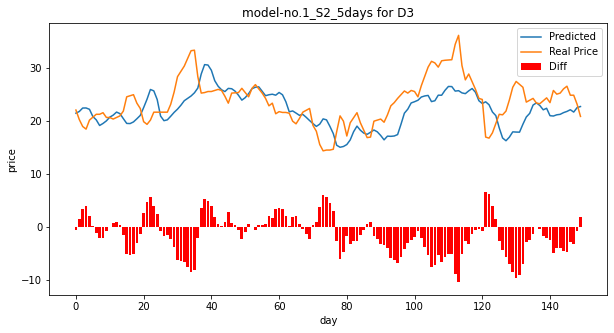

In [ ]:
def DrawingPlot(predict, real, days):
  plt.figure(figsize=(10,5))
  plt.plot(predict[-days:], label='Predicted')
  plt.plot(real[-days:], label='Real Price')
  plt.bar(np.arange(days), diff_price[-days:].reshape(-1), color='r', label='Diff', align='center')
  # plt.plot(diff_price[-150:], color='r', label='Diff')
  plt.xlabel('day')   
  plt.ylabel('price')
  plt.title(f'model-no.{model_no}_{model_version}_{pastDay}days for D{futureDay}')
  plt.legend()
  plt.savefig(f'{save_route}img/{model_version}_{time_now}.png')  
  plt.show()
DrawingPlot(pre_price, test_price, pic_days)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(test_price.reshape(-1, 1), pre_price.reshape(-1, 1))
RMSE = np.sqrt(MSE)
R2 = r2_score(test_price.reshape(-1, 1), pre_price.reshape(-1, 1))
print(f"MSE value : {MSE}", f"\nRMSE value : {RMSE}", f"\nR2 score value : {R2}")

MSE value : 8.979254171415318 
RMSE value : 2.9965403670592057 
R2 score value : 0.5284521328669878


儲存每一次試驗資訊

In [ ]:
model_h5_name = f'{model_name}_s2_{time_now}.h5'
result_column_lists = ['Time', 'train_start_date', 'pastDay', 'futureDay', 'batch_size', 'epochs', 'validation_split','MSE', 'RMSE', 'R2', 'model_h5_name']
result_lists = [time_now, train_start_date, pastDay, futureDay, batch_size, epochs, validation_split, MSE, RMSE, R2, model_h5_name]


if os.path.exists(f'{save_route}module_result/{model_version}_result.csv'):
  with open(f'{save_route}module_result/{model_version}_result.csv', 'a+', encoding='utf-8', newline='') as f_result:
    result_writer = csv.writer(f_result)
    # result_writer.writerow(result_column_lists)
    result_writer.writerow(result_lists)
else:
  with open(f'{save_route}module_result/{model_version}_result.csv', 'w', encoding='utf-8', newline='') as f_result:
    result_writer = csv.writer(f_result)
    result_writer.writerow(result_column_lists)
    result_writer.writerow(result_lists)
  
  


https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/ \\
The input to every LSTM layer must be three-dimensional.

The three dimensions of this input are:

1. Samples. One sequence is one sample. A batch is comprised of one or more samples.
2. Time Steps. One time step is one point of observation in the sample.
3. Features. One feature is one observation at a time step.